In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kickstarter-projects/ks-projects-201801.csv
/kaggle/input/kickstarter-projects/ks-projects-201612.csv


**Что нужно было делать на kikstarter в 2018 году?
Цель этого небольшого шуточного анализа простая - выяснить критерии наиболее финансово-успешных проектов, запущенных до 2018 года.**

**Начнём с общего обзора данных.**

In [6]:
df = pd.read_csv('/kaggle/input/kickstarter-projects/ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


**Проверим целостность и типы данных.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


**Всё в порядке, кроме нескольких имен и 4 тысяч значений, которых не являются необходимым и представляют собой конвертацию в USD через какую-то автоматизацию. Также, даты начала и конца имеют тип object и при работе, если понадобиться, то над будет поменять.**

**Начнем с поиска страны на аудиторию, которой мы будем производить контент. Предположим, что колонка currency будет единообразно указывать на страну.**

In [8]:
df.groupby('currency')['pledged'].sum().sort_values(ascending=False).at['USD']

currency
USD    2.839124e+09
GBP    1.621298e+08
EUR    1.352500e+08
SEK    1.143144e+08
CAD    1.137487e+08
HKD    7.818579e+07
AUD    5.958547e+07
DKK    5.044545e+07
MXN    4.658826e+07
NOK    2.226107e+07
JPY    1.308318e+07
CHF    1.286685e+07
NZD    1.088363e+07
SGD    8.099630e+06
Name: pledged, dtype: float64

**Как видно из данных в USD больше всего валюты, а значит при создании будем ориентироваться на жителей США.**

**Продолжим, поиском подходящей основной категории. Искать будем по количеству денег, которые были вложены в каждую из категорий за счёт успешнозапущенных проектов.**

In [9]:
#Так как неизвестно как именно отмечаются успешные проекты, то сначала найдём обозначение.
df.state.unique()
#Подходящее обозначение successful, возьмём его

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

**Построим бокс график по 5 самым прибыльным категориям.**

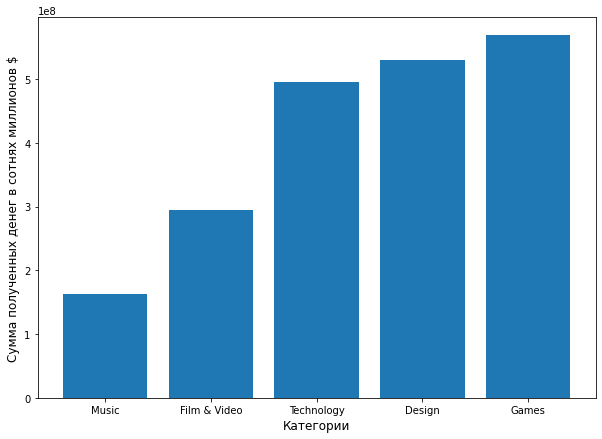

In [10]:
new_tb = df[(df['state'] == 'successful') & (df['currency'] == 'USD')].groupby('main_category').sum()
top_five_goal = new_tb.pledged.sort_values()[-5::1]


plt.rc('axes', labelsize=12) 

plt.figure(figsize=(10,7))
plt.bar(top_five_goal.index,top_five_goal)
plt.xlabel('Категории')
plt.ylabel('Сумма полученных денег в сотнях миллионов $')
plt.show()

**Категория по играм значительно превосходит остальные, а значит предстоит произвести игру.**

**Следующим шагом, проведем такой же анализ, но для категорий внутри Games.**

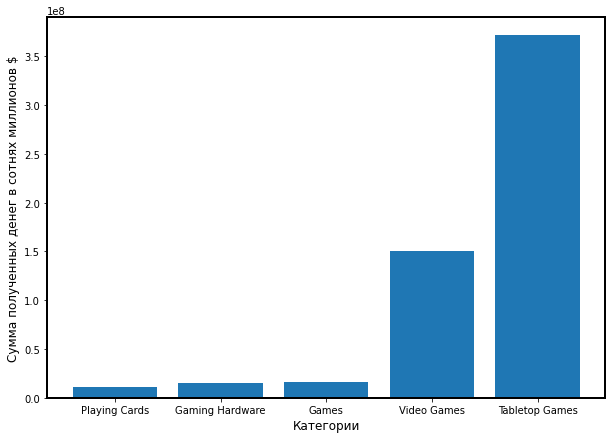

In [11]:
games = df[(df['main_category'] == 'Games') &(df['currency'] == 'USD')]
sub_games = games[games['state'] == 'successful'].groupby('category').sum()
top_five_sub_goal = sub_games.pledged.sort_values()[-5::1]

plt.rc('axes', linewidth=2) 

plt.figure(figsize=(10,7))
plt.bar(top_five_sub_goal.index,top_five_sub_goal)
plt.xlabel('Категории')
plt.ylabel('Сумма полученных денег в сотнях миллионов $')
plt.show()

**Таким образом предостоит создать Tabletop Game.**

**Посмотрим наиболее успешных представителей категории и подкатегории для понимания на кого ориентироваться и дальнейшего анализа индустрии на основе их.**

In [18]:
games =  df[(df['main_category'] == 'Games') & (df['currency'] == 'USD') & (df['category'] == 'Tabletop Games')]

print(games.loc[games.pledged.sort_values(ascending=False)[0:5].index,['name','pledged']].to_string(index=False))

                                             name     pledged
                       Kingdom Death: Monster 1.5 12393139.69
                                Exploding Kittens  8782571.99
THE 7th CONTINENT – What Goes Up, Must Come Down.  7072757.00
                           Zombicide: Green Horde  5004494.58
                                       Rising Sun  4228060.00


**В заверешении посчитаем сколько приблизательно лучше поставить goal для финансовой успешности проекта.
Для начала посчитаем средние значения запрашиваемых и собранных для каждого из возможных состояний проекта.**

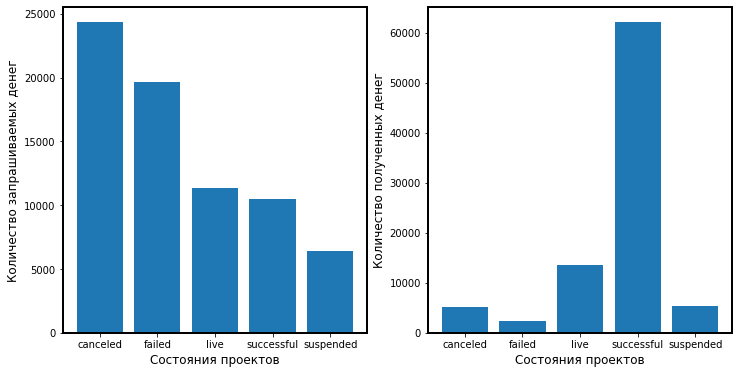

In [13]:
# games.groupby('state').mean().goal.index
# sns.barplot(x= games.groupby('state').mean().goal.index, y = games.groupby('pledged').mean().pledged,data=games)
games = games[games['pledged'] > 0]
games_force = games.groupby('state').mean()


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(x = games_force.index, height =games_force.goal, data=games)
plt.xlabel('Состояния проектов')
plt.ylabel('Количество запрашиваемых денег')
plt.subplot(122)
plt.bar(x= games_force.index, height =games_force.pledged, data=games)
plt.xlabel('Состояния проектов')
plt.ylabel('Количество полученных денег')
plt.show()

**Как видно из графиков, чем больше просили компании денег первоначально, тем больше шансов, что проект не заканчивали. С другой стороны, самые успешные проектом получали сильно больше, чем просили. 
Необходимо поглубже разобраться в этой тенденции для этого построим график "ящик с усами".**

<function matplotlib.pyplot.show(close=None, block=None)>

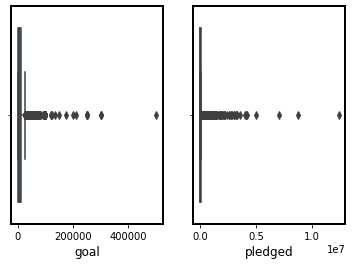

In [14]:
plt.subplot(121)
sns.boxplot(x = games[games['state'] == 'successful'].goal)
plt.subplot(122)
sns.boxplot(x = games[games['state'] == 'successful'].pledged)
plt.show

**Получившийся график совсем не похож на классический из-за большого количества выбросов особенно со стороны вложенных денег. Возможно, что специально занизив необходимую для создания сумму, по итогу можно получить больше. Для проверки проанализируем корреляцию между этими событиями.**

In [15]:
corr_games = games[games['state'] == 'successful'].corr()
corr_games.loc[['goal','pledged'],['goal','pledged']]

,goal,pledged
goal,1.000000,0.429356
pledged,0.429356,1.000000


**0.4 небольшая корреляция, а значит лучше не брать её во внимание.
Основываясь на данных, я бы предпочел взять среднюю цену из тех кто добился успеха и тогда имели бы больше шансов получить среднее из тех, что вложили.**

**Подведём выводы**

In [33]:
print("Страна для рекламы и валюта в которой будет финальная цель: USD")
print("Категория и под категория проекта: Games - Tabletop games")
print('Денег для запроса:\n' + str(games[games['state'] == 'successful'].groupby('state').mean().goal.at['successful']))
print('Предположительно денег будет получено:\n' + str(games[games['state'] == 'successful'].groupby('state').mean().pledged.at['successful']))

Страна для рекламы и валюта в которой будет финальная цель: USD
Категория и под категория проекта: Games - Tabletop games
Денег для запроса:
10519.301956194617
Предположительно денег будет получено:
62117.31370172196
